# Разведочный анализ данных.

#### Подключение требуемых библиотек для анализа данных:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skl
import tensorflow as tf

#### Загрузка данных из Excel и объединение в один датасет:

In [2]:
df_bp=pd.read_excel('Data/X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('Data/X_nup.xlsx', index_col=0)
df=df_bp.merge(df_nup, left_index=True, right_index=True, how='inner')

#### Вывод наименования столбцов, общей информации, количества уникальных переменных и полученого датасета:

In [3]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [5]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [6]:
df.index = df.index.astype('int')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


#### Вывод описательной статистики датасета:

In [7]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [8]:
df=df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки', 'Угол нашивки, град']]

#### Построение гистограм распределения переменных:

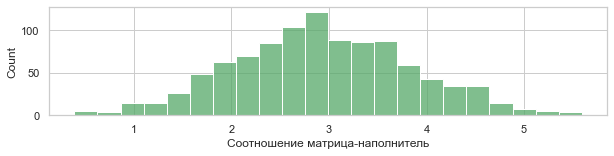

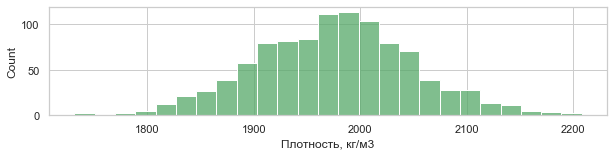

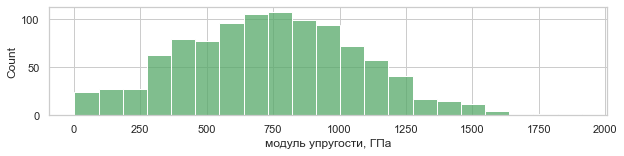

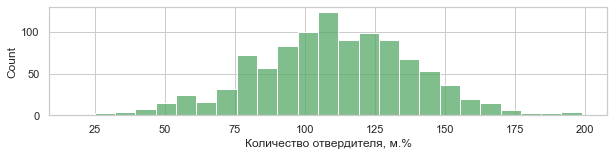

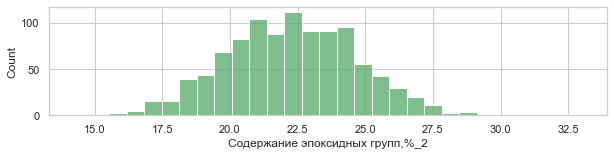

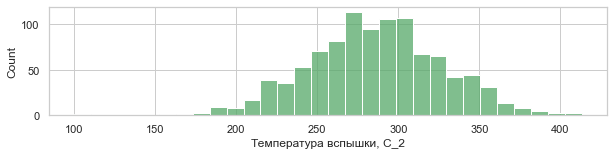

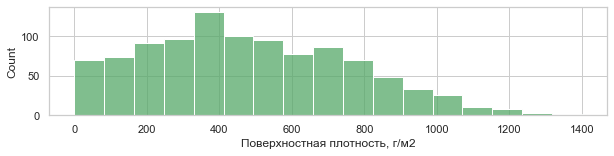

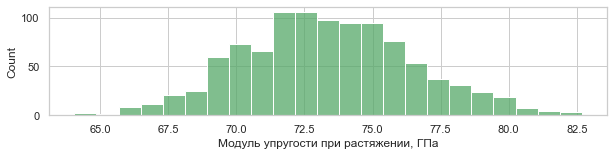

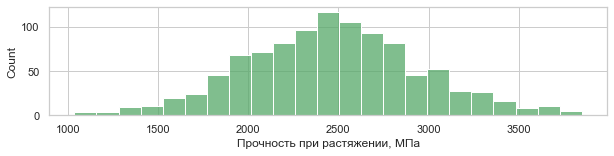

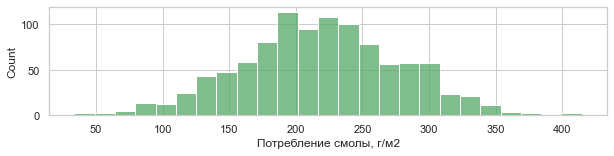

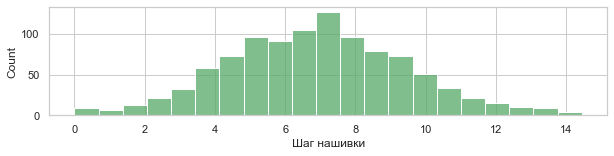

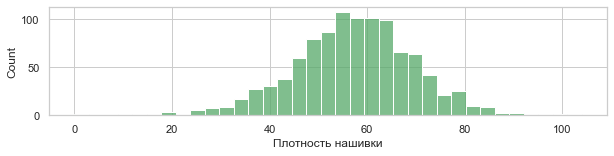

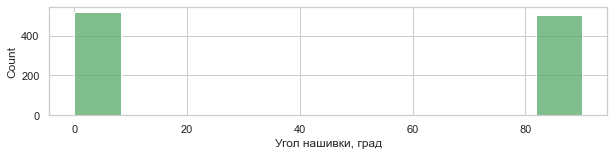

In [9]:
sns.set(style='whitegrid')
for col in df.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(x=col, data=df, color="g")
    plt.show()

#### Построение диаграмм "Ящик с усами" для анализа выбросов данных:

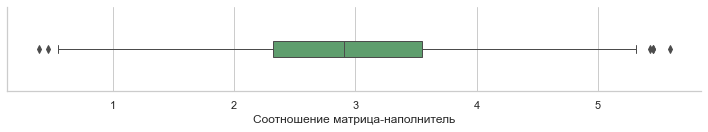

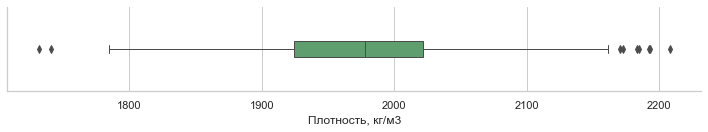

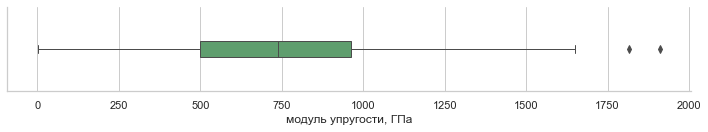

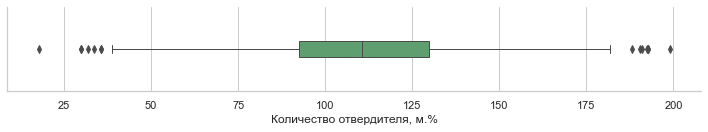

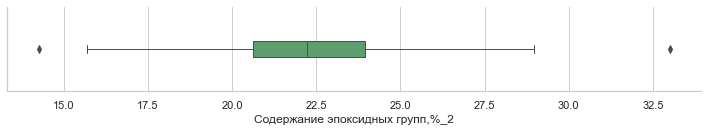

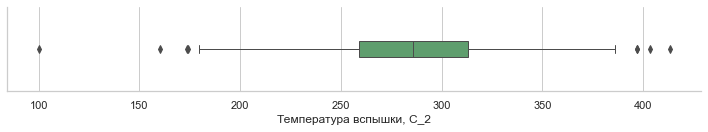

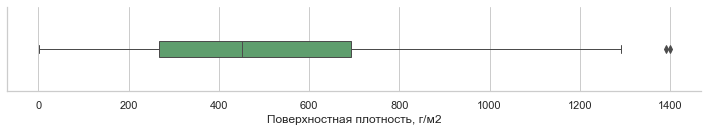

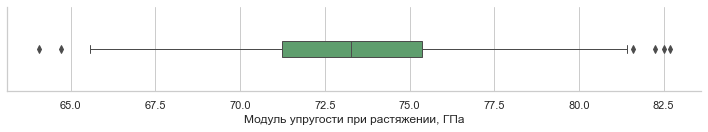

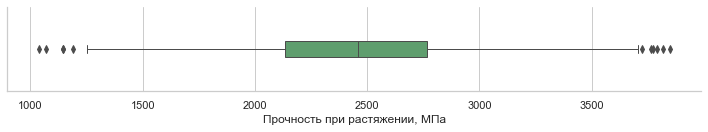

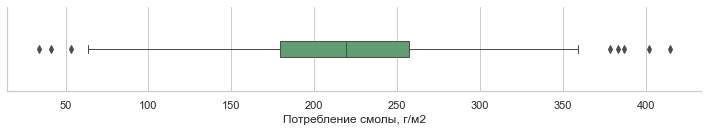

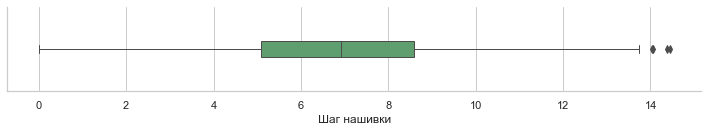

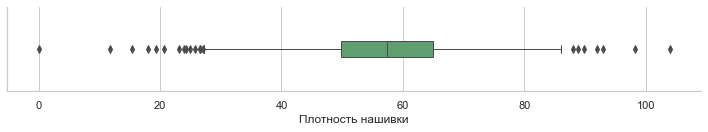

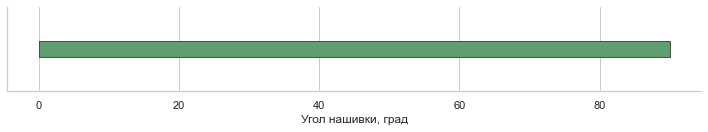

In [10]:
for col in df.columns:
    sns.catplot(x=col, data=df, kind="box", height=2, width=0.2, aspect=5, linewidth=1, color="g")

#### Построение корреляционной матрицы:

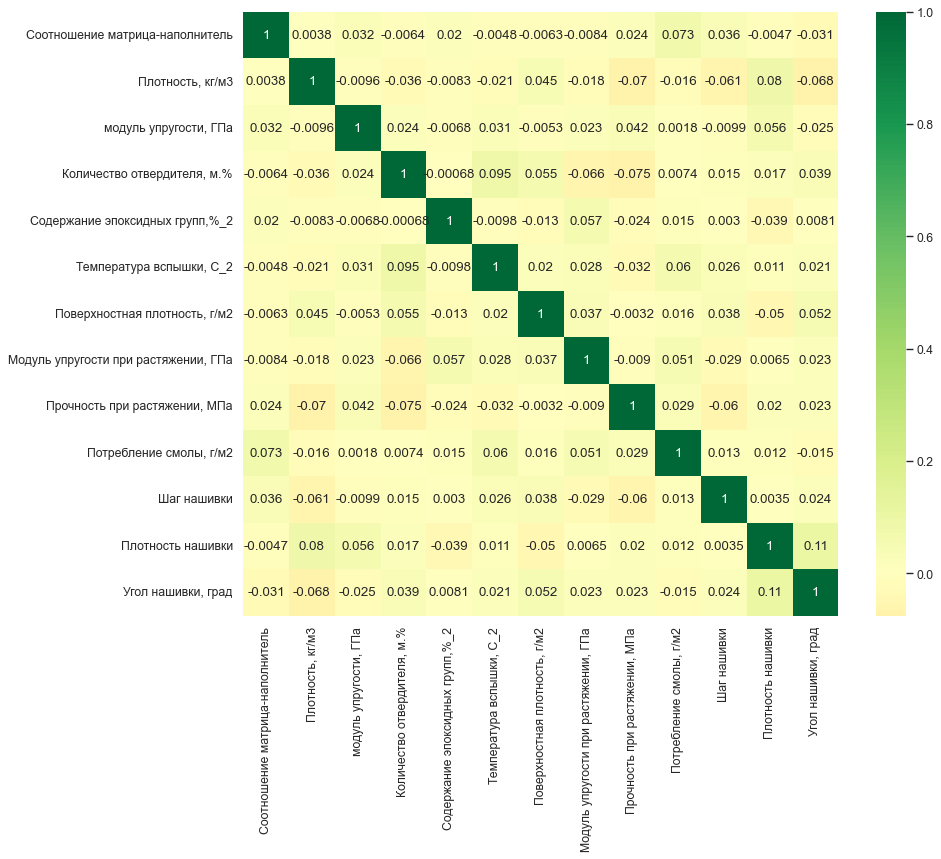

In [11]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

#### Построение парных диаграмм рассеяния исследуемых величин с разбивкой по категориальной перемнной:

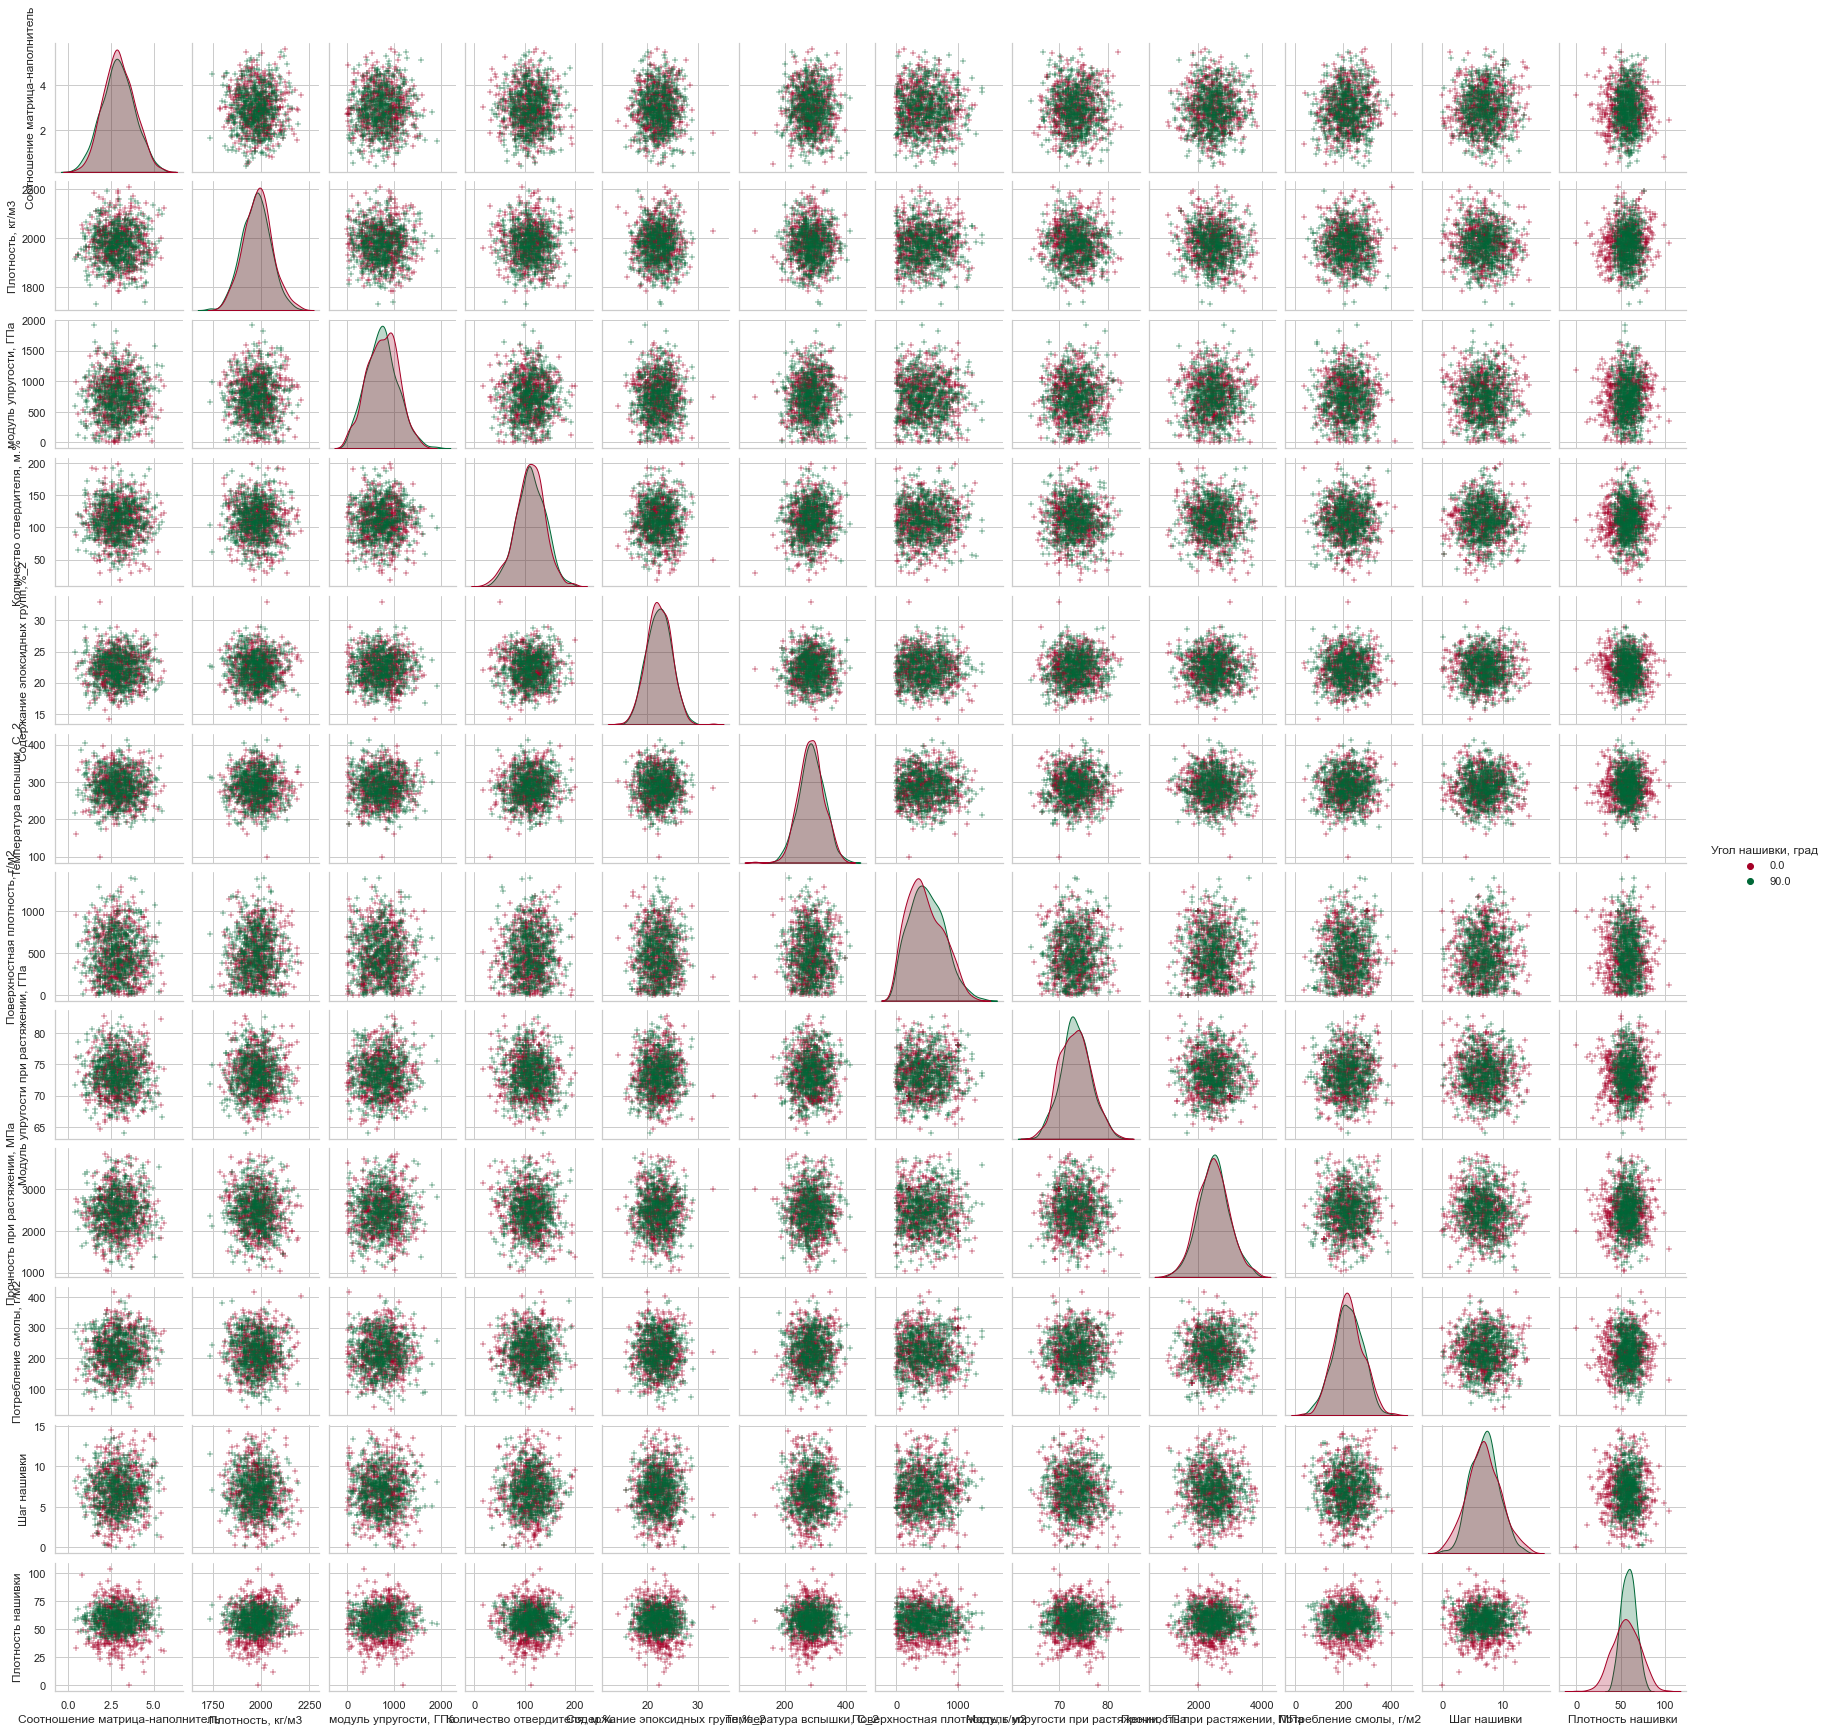

In [12]:
sns.pairplot(df, hue='Угол нашивки, град',  height=2, aspect=1, palette='RdYlGn', markers="+")

##### Наблюдается отсутсвие выраженных корреляций и видимых парных функциональных зависимостей между перменными.
#### Замена выбросов данных на ячейки NaN для дальнейшего их удаления:

In [13]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

#### Количество выбросов по столбцам:

In [14]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Шаг нашивки                              4
Плотность нашивки                       21
Угол нашивки, град                       0
dtype: int64

In [15]:
df.isnull().sum().sum()

93

#### Удаление выбросов:

In [16]:
df=df.dropna()
round(df.describe())

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
count,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0,936.0
mean,3.0,1974.0,738.0,111.0,22.0,286.0,483.0,73.0,2467.0,218.0,7.0,57.0,46.0
std,1.0,71.0,329.0,27.0,2.0,39.0,280.0,3.0,464.0,58.0,3.0,11.0,45.0
min,1.0,1784.0,2.0,39.0,16.0,179.0,1.0,66.0,1250.0,64.0,0.0,27.0,0.0
25%,2.0,1923.0,499.0,93.0,21.0,259.0,266.0,71.0,2147.0,179.0,5.0,50.0,0.0
50%,3.0,1977.0,739.0,111.0,22.0,286.0,458.0,73.0,2458.0,218.0,7.0,58.0,90.0
75%,4.0,2020.0,958.0,130.0,24.0,313.0,696.0,75.0,2755.0,256.0,9.0,65.0,90.0
max,5.0,2162.0,1649.0,182.0,29.0,386.0,1291.0,81.0,3706.0,359.0,14.0,86.0,90.0


In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
Угол нашивки, град                      0
dtype: int64

#### Масштабирование датасета для правильного построения моделей анализа и прогнозирования данных:

In [18]:
df_s=pd.DataFrame(skl.StandardScaler().fit_transform(df), columns=df.columns)
df_s

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.162360,0.226834,-1.023787
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-0.763689,-0.930436,-1.023787
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,-0.040228,-1.023787
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,0.226834,-1.023787
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,1.117043,-1.023787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-0.732548,-0.310188,0.531478,-0.885307,-0.871403,0.983609,-0.977698,-0.070548,-0.172989,-1.602276,0.861447,-0.928676,0.976766
932,0.580295,1.074592,-0.893411,1.297605,-1.090103,-0.808159,-0.472549,-0.126591,-0.231014,-1.728193,1.455162,-0.329475,0.976766
933,0.397344,-0.023557,-0.978322,-0.014163,0.730480,-0.955250,0.918256,0.470794,0.421529,0.328626,-1.098113,0.906035,0.976766
934,0.872860,1.310716,0.009825,1.127974,-1.237507,-0.260555,0.565897,0.242965,-0.853711,-0.354474,-0.240153,0.072034,0.976766


#### Групповая диаграмма плотностей распределения количественных переменных итогового датасета:

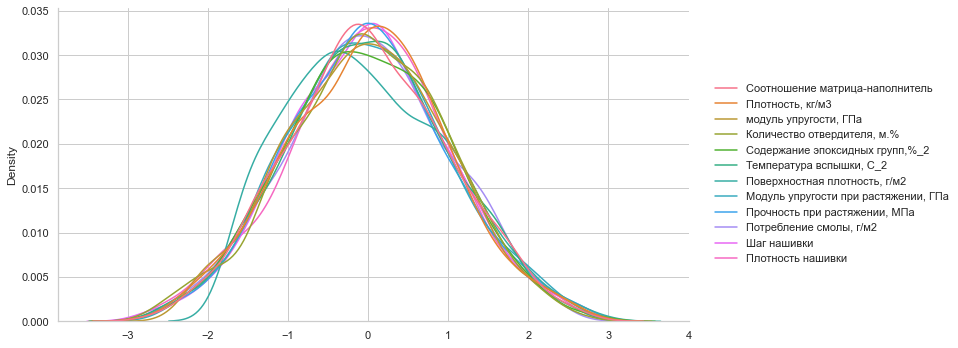

In [19]:
sns.displot(data=df_s.iloc[:,:12], kind="kde", height=5, aspect=2)

# Регрессионный анализ.

#### Разбиение датасета на входные перменные (X) и выходные (Y):

In [20]:
X=df_s.drop(columns=['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'])
Y=df_s[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]

## Линейная регрессия:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
LR=LinearRegression()
df_metrics_LR=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    LR.fit(X_train, y_train)
    train_prediction=LR.predict(X_train)
    test_prediction=LR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_LR=df_metrics_LR.append({'LinearRegression (r2_train)':metrics.r2_score(y_train, train_prediction),
                                        'LinearRegression (r2_test)':metrics.r2_score(y_test, test_prediction)}, ignore_index=True)

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.030261009269127115
Коэффициент детерминации тестовой выборки: -0.053394649572633845 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.015835663452295812
Коэффициент детерминации тестовой выборки: 0.014607965998299388 



#### Перекрёстная проверка линейной регрессии:

In [22]:
from sklearn.model_selection import cross_val_score
df_metrics_LRCV=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    scores=cross_val_score(LR, X_train, y_train, cv=5, scoring='r2')
    train_prediction=LR.predict(X_train)
    test_prediction=LR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_LRCV=df_metrics_LRCV.append({'LinearRegressionCV (r2_train)':metrics.r2_score(y_train, train_prediction),
                                            'LinearRegressionCV (r2_test)':metrics.r2_score(y_test, test_prediction)}, ignore_index=True)

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: -0.0014802413340733178
Коэффициент детерминации тестовой выборки: -0.011795879377620722 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.015835663452295812
Коэффициент детерминации тестовой выборки: 0.014607965998299388 



## Метод случайного леса:

In [23]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
df_metrics_RFR=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    RFR.fit(X_train, y_train)
    train_prediction=RFR.predict(X_train)
    test_prediction=RFR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_RFR=df_metrics_RFR.append({'RandomForestRegressor (r2_train)':metrics.r2_score(y_train, train_prediction),
                                          'RandomForestRegressor (r2_test)':metrics.r2_score(y_test, test_prediction)}, ignore_index=True)

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.8529343854833569
Коэффициент детерминации тестовой выборки: -0.09070258579583412 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.8546475756896817
Коэффициент детерминации тестовой выборки: -0.03442354187570884 



#### Поиск по сетке метода случайного леса:

In [24]:
from sklearn.model_selection import GridSearchCV
grid_param={'n_estimators': range(100,500,100), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6]}
GSCV=GridSearchCV(RFR, grid_param, scoring='r2', cv=5, n_jobs=-1)
df_metrics_RFRGSCV=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    GSCV.fit(X_train, y_train)
    model=GSCV.best_estimator_
    model.fit(X_train, y_train)
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    print(col)
    print('Лучшие параметры:', GSCV.best_estimator_)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_RFRGSCV=df_metrics_RFRGSCV.append({'RandomForestRegressorGSCV (r2_train)':metrics.r2_score(y_train, train_prediction),
                                                  'RandomForestRegressorGSCV (r2_test)':metrics.r2_score(y_test, test_prediction)},
                                                 ignore_index=True)

Модуль упругости при растяжении, ГПа
Лучшие параметры: RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=300)
Коэффициент детерминации обучающей выборки: 0.16192858732711313
Коэффициент детерминации тестовой выборки: -0.028854835283088187 

Прочность при растяжении, МПа
Лучшие параметры: RandomForestRegressor(max_depth=4, max_features='sqrt')
Коэффициент детерминации обучающей выборки: 0.15462722169173726
Коэффициент детерминации тестовой выборки: -0.0005021002292846521 



## Метод ближайших соседей:

In [25]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
df_metrics_KNN=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    KNN.fit(X_train, y_train)
    train_prediction=KNN.predict(X_train)
    test_prediction=KNN.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_KNN=df_metrics_KNN.append({'KNeighborsRegressor (r2_train)':metrics.r2_score(y_train, train_prediction),
                                          'KNeighborsRegressor (r2_test)':metrics.r2_score(y_test, test_prediction)}, ignore_index=True)

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.19630926673080962
Коэффициент детерминации тестовой выборки: -0.22031500563009376 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.19906366236622686
Коэффициент детерминации тестовой выборки: -0.23977723056882394 



#### Поиск по сетке метода ближайших соседей:

In [26]:
grid_param={'n_neighbors': range(2,500)}
GSCV=GridSearchCV(KNN, grid_param, scoring='r2', cv=5, n_jobs=-1)
df_metrics_KNNGSCV=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    GSCV.fit(X_train, y_train)
    model=GSCV.best_estimator_
    model.fit(X_train, y_train)
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    print(col)
    print('Лучшие параметры:', GSCV.best_estimator_)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_KNNGSCV=df_metrics_KNNGSCV.append({'KNeighborsRegressorGSCV (r2_train)':metrics.r2_score(y_train, train_prediction),
                                                  'KNeighborsRegressorGSCV (r2_test)':metrics.r2_score(y_test, test_prediction)},
                                                 ignore_index=True)

Модуль упругости при растяжении, ГПа
Лучшие параметры: KNeighborsRegressor(n_neighbors=80)
Коэффициент детерминации обучающей выборки: 0.02128458332330585
Коэффициент детерминации тестовой выборки: -0.020649624387157672 

Прочность при растяжении, МПа
Лучшие параметры: KNeighborsRegressor(n_neighbors=490)
Коэффициент детерминации обучающей выборки: 0.0008695416989294991
Коэффициент детерминации тестовой выборки: 0.0003725933176457197 



## Среднее значение как предсказание:

In [27]:
df_metrics_MEAN=pd.DataFrame()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    train_prediction=np.full(len(y_train), y_train.mean())
    test_prediction=np.full(len(y_test), y_train.mean())
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics_MEAN=df_metrics_MEAN.append({'MEAN (r2_train)':metrics.r2_score(y_train, train_prediction),
                                            'MEAN (r2_test)':metrics.r2_score(y_test, test_prediction)},
                                           ignore_index=True)

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.0
Коэффициент детерминации тестовой выборки: -0.0031413752563778097 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.0
Коэффициент детерминации тестовой выборки: -0.0037442284665589742 



#### Сводная таблица коэффициентов детерминаци:

In [28]:
df_metrics=pd.concat([df_metrics_LR,df_metrics_LRCV,df_metrics_RFR,df_metrics_RFRGSCV,df_metrics_KNN,
                      df_metrics_KNNGSCV,df_metrics_MEAN], axis=1)
df_metrics=df_metrics.rename(index={0:'Модуль упругости при растяжении, ГПа',1:'Прочность при растяжении, МПа'})
df_metrics.T

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
LinearRegression (r2_train),0.030261,0.015836
LinearRegression (r2_test),-0.053395,0.014608
LinearRegressionCV (r2_train),-0.001480,0.015836
LinearRegressionCV (r2_test),-0.011796,0.014608
RandomForestRegressor (r2_train),0.852934,0.854648
RandomForestRegressor (r2_test),-0.090703,-0.034424
RandomForestRegressorGSCV (r2_train),0.161929,0.154627
RandomForestRegressorGSCV (r2_test),-0.028855,-0.000502
KNeighborsRegressor (r2_train),0.196309,0.199064
KNeighborsRegressor (r2_test),-0.220315,-0.239777


# Нейронная сеть.

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
X=df.drop(columns=['Соотношение матрица-наполнитель'])
y=df['Соотношение матрица-наполнитель']

In [31]:
def build_and_compile_model(norm):
    model=keras.Sequential([norm, layers.Dense(256, activation='relu'),
                            layers.Dropout(.5),
                            layers.Dense(256, activation='relu'),
                            layers.Dense(1)])
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    return model
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=92)
matrix_normalizer=layers.Normalization(axis=-1)
matrix_normalizer.adapt(np.array(X_train))

In [33]:
DNN_model=build_and_compile_model(matrix_normalizer)
DNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               3328      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,402
Trainable params: 69,377
Non-trainable params: 25
___________________________________________________

In [34]:
%%time
history=DNN_model.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30)

Epoch 1/30
17/17 [==============================] - 2s 30ms/step - loss: 722.6261 - val_loss: 11.3297
Epoch 2/30
17/17 [==============================] - 0s 7ms/step - loss: 10.9194 - val_loss: 10.2879
Epoch 3/30
17/17 [==============================] - 0s 8ms/step - loss: 9.4573 - val_loss: 8.5418
Epoch 4/30
17/17 [==============================] - 0s 9ms/step - loss: 7.6717 - val_loss: 6.7751
Epoch 5/30
17/17 [==============================] - 0s 6ms/step - loss: 5.9946 - val_loss: 5.2215
Epoch 6/30
17/17 [==============================] - 0s 11ms/step - loss: 4.5790 - val_loss: 3.9533
Epoch 7/30
17/17 [==============================] - 0s 8ms/step - loss: 3.4530 - val_loss: 2.9864
Epoch 8/30
17/17 [==============================] - 0s 7ms/step - loss: 2.6083 - val_loss: 2.2631
Epoch 9/30
17/17 [==============================] - 0s 8ms/step - loss: 1.9930 - val_loss: 1.7564
Epoch 10/30
17/17 [==============================] - 0s 7ms/step - loss: 1.5602 - val_loss: 1.4174
Epoch 11/30


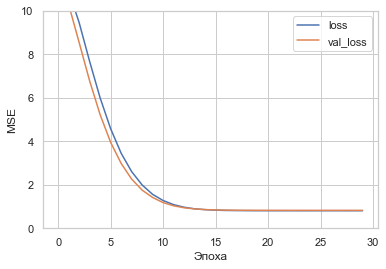

In [35]:
plot_loss(history)

In [36]:
DNN_model.evaluate(X_test, y_test, verbose=0)

0.770998477935791

In [37]:
train_prediction=DNN_model.predict(X_train).flatten()
test_prediction=DNN_model.predict(X_test).flatten()
print('Соотношение матрица-наполнитель')
print('Коэффициент детерминации обучающей выборки:', round(metrics.r2_score(y_train, train_prediction),7))
print('Коэффициент детерминации тестовой выборки:', round(metrics.r2_score(y_test, test_prediction),7))

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: -3.06e-05
Коэффициент детерминации тестовой выборки: -0.0244346


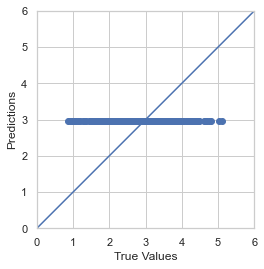

In [38]:
a=plt.axes(aspect='equal')
plt.scatter(y_test, test_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0, 6]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

In [39]:
DNN_model.save('DNN_model')

INFO:tensorflow:Assets written to: DNN_model\assets
